In [6]:
import requests 
from bs4 import BeautifulSoup as bs
import re


In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt

%matplotlib inline

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [9]:
link = 'https://www.amazon.in/Boldfit-Yoga-EVA-Material-Meditation/product-reviews/B091M5FN3V/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

In [10]:
page = requests.get(link)

In [11]:
page

<Response [200]>

In [12]:
page.content

b'<!doctype html><html lang="en-in" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com">\n<link rel="dns-prefetch" href="https://m.media-amazon.com">\n<link rel="dns-prefetch" href="https://completion.amazon.com">\n\n<!-- sp:feature:aui-assets -->\n<link rel="stylesheet" href="https://images-eu.ssl-images-amazon.com/images/I/11EIQ5IGqaL._RC|012LjolmrML.css,418YjvsUB+L.css,21qPwhPKAAL.css,01Vctty9pOL.css,017DsKjNQJL.css,0131vqwP5UL.css,41EWOOlBJ9L.css,11TIuySqr6L.css,01ElnPiDxWL.css,11bGSgD5pDL.css,01Dm5eKVxwL.css,01IdKcBuAdL.css,01y-XAlI+2L.css,01ZfXnjPmmL.css,01oDR3IULNL.css,31ZcpBfSgNL.css,01XPHJk60-L.css,01R0k0yxPXL.css,21xVR0NtxzL.css,11gneA3MtJL.css,21fecG8pUzL.css,01RddH8vm-L.css,01CFUgsA-YL.css,21AmhU6t0s

In [13]:
soup = bs(page.content,'html.parser')

In [14]:
print(soup.prettify())

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in">
 <!-- sp:feature:head-start -->
 <head>
  <script>
   var aPageStart = (new Date()).getTime();
  </script>
  <meta charset="utf-8"/>
  <!-- sp:feature:cs-optimization -->
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
  <link href="https://m.media-amazon.com" rel="dns-prefetch"/>
  <link href="https://completion.amazon.com" rel="dns-prefetch"/>
  <!-- sp:feature:aui-assets -->
  <link href="https://images-eu.ssl-images-amazon.com/images/I/11EIQ5IGqaL._RC|012LjolmrML.css,418YjvsUB+L.css,21qPwhPKAAL.css,01Vctty9pOL.css,017DsKjNQJL.css,0131vqwP5UL.css,41EWOOlBJ9L.css,11TIuySqr6L.css,01ElnPiDxWL.css,11bGSgD5pDL.css,01Dm5eKVxwL.css,01IdKcBuAdL.css,01y-XAlI+2L.css,01ZfXnjPmmL.css,01oDR3IULNL.css,31ZcpBfSgNL.css,01XPHJk60-L.css,01R0k0yxPXL.css,21xVR0NtxzL.css,11gneA3MtJL.css,21fecG8pUzL.css,01RddH8vm-L.css,01CFUgsA-YL.css,21AmhU6t0s

In [15]:
names = soup.find_all('span',class_='a-profile-name')

In [16]:
names

[<span class="a-profile-name">Suya</span>,
 <span class="a-profile-name">Rekha G.</span>,
 <span class="a-profile-name">Suya</span>,
 <span class="a-profile-name">Pratiksha</span>,
 <span class="a-profile-name">lakhan khandelwal</span>,
 <span class="a-profile-name">Rimpa saha</span>,
 <span class="a-profile-name">Amazon customer</span>,
 <span class="a-profile-name">Girish</span>,
 <span class="a-profile-name">RAHUL</span>,
 <span class="a-profile-name">Bhoomika karecha<span class="a-profile-verified-badge"><span class="a-profile-verified-text"></span></span></span>,
 <span class="a-profile-name">Shivanshu Gupta</span>,
 <span class="a-profile-name">Somanath behera</span>]

In [17]:
cust_name = []
for i in range(0,len(names)):
    cust_name.append(names[i].get_text())
cust_name

['Suya',
 'Rekha G.',
 'Suya',
 'Pratiksha',
 'lakhan khandelwal',
 'Rimpa saha',
 'Amazon customer',
 'Girish',
 'RAHUL',
 'Bhoomika karecha',
 'Shivanshu Gupta',
 'Somanath behera']

In [18]:
cust_name.pop(0)
cust_name

['Rekha G.',
 'Suya',
 'Pratiksha',
 'lakhan khandelwal',
 'Rimpa saha',
 'Amazon customer',
 'Girish',
 'RAHUL',
 'Bhoomika karecha',
 'Shivanshu Gupta',
 'Somanath behera']

In [19]:
cust_name.pop(0)
cust_name

['Suya',
 'Pratiksha',
 'lakhan khandelwal',
 'Rimpa saha',
 'Amazon customer',
 'Girish',
 'RAHUL',
 'Bhoomika karecha',
 'Shivanshu Gupta',
 'Somanath behera']

In [20]:
title = soup.find_all('a',class_='review-title-content')

In [21]:
title

[<a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/R2TZSBLVD33L7K?ASIN=B091M5FN3V">
 <span>Good quality and durable material</span>
 </a>,
 <a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/R1Y2GNDM68X89S?ASIN=B091M5FN3V">
 <span>Comfortable</span>
 </a>,
 <a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/ROIHDSB1EJXDD?ASIN=B091M5FN3V">
 <span>Great quality product</span>
 </a>,
 <a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/R1C692585QIBKF?ASIN=B091M5FN3V">
 <span>Very comfortable yoga mat,go for it</span>
 </a>,
 <a class="a-size-base a-link-normal review-title a-color-base review-title-content a

In [22]:
review_title = []
for i in range(0,len(title)):
    review_title.append(title[i].get_text())
review_title

['\nGood quality and durable material\n',
 '\nComfortable\n',
 '\nGreat quality product\n',
 '\nVery comfortable yoga mat,go for it\n',
 '\nGood mat in this price range\n',
 '\nAmazing Yoga Mat\n',
 '\nThis mat is amazing....\n',
 '\nComfortable and durable loved this\n',
 '\nBest\n',
 '\nExcellent product\n']

In [23]:
review_title[:] = [titles.lstrip('\n') for titles in review_title]
review_title

['Good quality and durable material\n',
 'Comfortable\n',
 'Great quality product\n',
 'Very comfortable yoga mat,go for it\n',
 'Good mat in this price range\n',
 'Amazing Yoga Mat\n',
 'This mat is amazing....\n',
 'Comfortable and durable loved this\n',
 'Best\n',
 'Excellent product\n']

In [24]:
review_title[:] = [titles.rstrip('\n') for titles in review_title]
review_title

['Good quality and durable material',
 'Comfortable',
 'Great quality product',
 'Very comfortable yoga mat,go for it',
 'Good mat in this price range',
 'Amazing Yoga Mat',
 'This mat is amazing....',
 'Comfortable and durable loved this',
 'Best',
 'Excellent product']

In [25]:
rating = soup.find_all('i',class_='review-rating')
rating

[<i class="a-icon a-icon-star a-star-5 review-rating" data-hook="review-star-rating-view-point"><span class="a-icon-alt">5.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-1 review-rating" data-hook="review-star-rating-view-point"><span class="a-icon-alt">1.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-5 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">5.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-5 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">5.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-5 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">5.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-5 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">5.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-5 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">5.0 out of 5 stars</sp

In [26]:
rate = []
for i in range(0,len(rating)):
    rate.append(rating[i].get_text())
rate

['5.0 out of 5 stars',
 '1.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars']

In [27]:
rate.pop(0)

'5.0 out of 5 stars'

In [28]:
rate.pop(0)

'1.0 out of 5 stars'

In [29]:
len(rate)

10

In [30]:
review = soup.find_all("span",{"data-hook":"review-body"})
review

[<span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>
   Very good quality.<br/>Its light weight and durable.<br/>Form is thick as mentioned and gives nice cushion.<br/>Easy to lay down mat and roll and keep once finished work out.<br/>Doesn't absorb any water or sweat so easy to clean using towel or any cloth.<br/>I appartment has tiles on floor and this mat doesn't move or slip while doing yoga.
 </span>
 </span>,
 <span class="a-size-base review-text review-text-content" data-hook="review-body"><div class="a-section a-spacing-small a-spacing-top-mini video-block" id="video-block-R1Y2GNDM68X89S">
 <video class="cr-video-desktop" controls="" id="review-video-id-R1Y2GNDM68X89S" poster="https://images-eu.ssl-images-amazon.com/images/I/915l5YEEw8S._SL256.png" preload="none">
 <source src="https://images-eu.ssl-images-amazon.com/images/I/81e5OBJsHJS.mp4" type="video/mp4"/>
   Your browser does not support HTML5 video.
 </video></div><input class="vide

In [31]:
review_content = []
for i in range(0,len(review)):
    review_content.append(review[i].get_text())
review_content

["\n\n  Very good quality.Its light weight and durable.Form is thick as mentioned and gives nice cushion.Easy to lay down mat and roll and keep once finished work out.Doesn't absorb any water or sweat so easy to clean using towel or any cloth.I appartment has tiles on floor and this mat doesn't move or slip while doing yoga.\n\n",
 "\n\n\n  Your browser does not support HTML5 video.\n\n\n  \xa0I like the quality of the yoga mat. It is quite firm and light. It is easy to roll and keep as a band has been provided. I think it is good for everyday yoga sessions. I'm not sure about the durability. I'll use it for sometime and update.I've attached a video of when it arrived if you want to check\n\n",
 '\n\n  A great quality product I received from amazon.And I am really happy it is so soft and light weight and u can use in all seasons.No sweating issue and quality issue at all.\n\n',
 '\n\n  Thus yoga mat is really light weight just attach the belt and carry it whereever u want and its lengt

In [32]:
review_content[:] = [reviews.lstrip('\n') for reviews in review_content]
review_content

["  Very good quality.Its light weight and durable.Form is thick as mentioned and gives nice cushion.Easy to lay down mat and roll and keep once finished work out.Doesn't absorb any water or sweat so easy to clean using towel or any cloth.I appartment has tiles on floor and this mat doesn't move or slip while doing yoga.\n\n",
 "  Your browser does not support HTML5 video.\n\n\n  \xa0I like the quality of the yoga mat. It is quite firm and light. It is easy to roll and keep as a band has been provided. I think it is good for everyday yoga sessions. I'm not sure about the durability. I'll use it for sometime and update.I've attached a video of when it arrived if you want to check\n\n",
 '  A great quality product I received from amazon.And I am really happy it is so soft and light weight and u can use in all seasons.No sweating issue and quality issue at all.\n\n',
 '  Thus yoga mat is really light weight just attach the belt and carry it whereever u want and its lengthwise and breathwi

In [33]:
review_content[:] = [reviews.rstrip('\n') for reviews in review_content]
review_content

["  Very good quality.Its light weight and durable.Form is thick as mentioned and gives nice cushion.Easy to lay down mat and roll and keep once finished work out.Doesn't absorb any water or sweat so easy to clean using towel or any cloth.I appartment has tiles on floor and this mat doesn't move or slip while doing yoga.",
 "  Your browser does not support HTML5 video.\n\n\n  \xa0I like the quality of the yoga mat. It is quite firm and light. It is easy to roll and keep as a band has been provided. I think it is good for everyday yoga sessions. I'm not sure about the durability. I'll use it for sometime and update.I've attached a video of when it arrived if you want to check",
 '  A great quality product I received from amazon.And I am really happy it is so soft and light weight and u can use in all seasons.No sweating issue and quality issue at all.',
 '  Thus yoga mat is really light weight just attach the belt and carry it whereever u want and its lengthwise and breathwise is also q

In [34]:
len(review_content)

10

In [35]:
cust_name
review_title
rate
review_content

["  Very good quality.Its light weight and durable.Form is thick as mentioned and gives nice cushion.Easy to lay down mat and roll and keep once finished work out.Doesn't absorb any water or sweat so easy to clean using towel or any cloth.I appartment has tiles on floor and this mat doesn't move or slip while doing yoga.",
 "  Your browser does not support HTML5 video.\n\n\n  \xa0I like the quality of the yoga mat. It is quite firm and light. It is easy to roll and keep as a band has been provided. I think it is good for everyday yoga sessions. I'm not sure about the durability. I'll use it for sometime and update.I've attached a video of when it arrived if you want to check",
 '  A great quality product I received from amazon.And I am really happy it is so soft and light weight and u can use in all seasons.No sweating issue and quality issue at all.',
 '  Thus yoga mat is really light weight just attach the belt and carry it whereever u want and its lengthwise and breathwise is also q

In [36]:
import pandas as pd
df = pd.DataFrame()
df

""


In [37]:
df['Customer Name']=cust_name
df

,Customer Name
0,Suya
1,Pratiksha
2,lakhan khandelwal
3,Rimpa saha
4,Amazon customer
5,Girish
6,RAHUL
7,Bhoomika karecha
8,Shivanshu Gupta
9,Somanath behera


In [38]:
df['Review title']=review_title
df

,Customer Name,Review title
0,Suya,Good quality and durable material
1,Pratiksha,Comfortable
2,lakhan khandelwal,Great quality product
3,Rimpa saha,"Very comfortable yoga mat,go for it"
4,Amazon customer,Good mat in this price range
5,Girish,Amazing Yoga Mat
6,RAHUL,This mat is amazing....
7,Bhoomika karecha,Comfortable and durable loved this
8,Shivanshu Gupta,Best
9,Somanath behera,Excellent product


In [39]:
df['Review title']=review_title
df['Ratings']=rate
df['Reviews']=review_content

In [40]:
df

,Customer Name,Review title,Ratings,Reviews
0,Suya,Good quality and durable material,5.0 out of 5 stars,Very good quality.Its light weight and durab...
1,Pratiksha,Comfortable,5.0 out of 5 stars,Your browser does not support HTML5 video.\n...
2,lakhan khandelwal,Great quality product,5.0 out of 5 stars,A great quality product I received from amaz...
3,Rimpa saha,"Very comfortable yoga mat,go for it",5.0 out of 5 stars,Thus yoga mat is really light weight just at...
4,Amazon customer,Good mat in this price range,5.0 out of 5 stars,This is the best yoga mat in this price rang...
5,Girish,Amazing Yoga Mat,5.0 out of 5 stars,Mat Dimensions (L/W/H) ensures comfort for p...
6,RAHUL,This mat is amazing....,5.0 out of 5 stars,The mat is perfect and it is anti slip and I...
7,Bhoomika karecha,Comfortable and durable loved this,5.0 out of 5 stars,It's been long I wanted yoga mat and I'm so ...
8,Shivanshu Gupta,Best,5.0 out of 5 stars,received this mat on the next day of order. ...
9,Somanath behera,Excellent product,5.0 out of 5 stars,It's so soft as a mat should be with very li...


In [41]:
#to get csv file 
# df.to_csv(r'E:\reviews.csv',index=True)

In [42]:
df = [Reviews.strip() for Reviews in df.Reviews] # remove both the leading and the trailing characters
df = [Reviews for Reviews in df if Reviews] # removes empty strings, because they are considered in Python as False
df[0:10]
# trailing character = some times we unnecesserily press space after completing statment
# leading character = some times we unnecesserily press space before starting statment

# here we got cleaned data

["Very good quality.Its light weight and durable.Form is thick as mentioned and gives nice cushion.Easy to lay down mat and roll and keep once finished work out.Doesn't absorb any water or sweat so easy to clean using towel or any cloth.I appartment has tiles on floor and this mat doesn't move or slip while doing yoga.",
 "Your browser does not support HTML5 video.\n\n\n  \xa0I like the quality of the yoga mat. It is quite firm and light. It is easy to roll and keep as a band has been provided. I think it is good for everyday yoga sessions. I'm not sure about the durability. I'll use it for sometime and update.I've attached a video of when it arrived if you want to check",
 'A great quality product I received from amazon.And I am really happy it is so soft and light weight and u can use in all seasons.No sweating issue and quality issue at all.',
 'Thus yoga mat is really light weight just attach the belt and carry it whereever u want and its lengthwise and breathwise is also quite lar

In [43]:
# Joining the list into one string/text
text = ' '.join(df)
text
# above cell output having multiple seperate statments= to get in one '' statment 

"Very good quality.Its light weight and durable.Form is thick as mentioned and gives nice cushion.Easy to lay down mat and roll and keep once finished work out.Doesn't absorb any water or sweat so easy to clean using towel or any cloth.I appartment has tiles on floor and this mat doesn't move or slip while doing yoga. Your browser does not support HTML5 video.\n\n\n  \xa0I like the quality of the yoga mat. It is quite firm and light. It is easy to roll and keep as a band has been provided. I think it is good for everyday yoga sessions. I'm not sure about the durability. I'll use it for sometime and update.I've attached a video of when it arrived if you want to check A great quality product I received from amazon.And I am really happy it is so soft and light weight and u can use in all seasons.No sweating issue and quality issue at all. Thus yoga mat is really light weight just attach the belt and carry it whereever u want and its lengthwise and breathwise is also quite large and the ma

In [44]:
len(text)

3551

In [45]:
#Punctuation
import string
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text


'Very good qualityIts light weight and durableForm is thick as mentioned and gives nice cushionEasy to lay down mat and roll and keep once finished work outDoesnt absorb any water or sweat so easy to clean using towel or any clothI appartment has tiles on floor and this mat doesnt move or slip while doing yoga Your browser does not support HTML5 video\n\n\n  \xa0I like the quality of the yoga mat It is quite firm and light It is easy to roll and keep as a band has been provided I think it is good for everyday yoga sessions Im not sure about the durability Ill use it for sometime and updateIve attached a video of when it arrived if you want to check A great quality product I received from amazonAnd I am really happy it is so soft and light weight and u can use in all seasonsNo sweating issue and quality issue at all Thus yoga mat is really light weight just attach the belt and carry it whereever u want and its lengthwise and breathwise is also quite large and the material is too good an

In [46]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['Very', 'good', 'qualityIts', 'light', 'weight', 'and', 'durableForm', 'is', 'thick', 'as', 'mentioned', 'and', 'gives', 'nice', 'cushionEasy', 'to', 'lay', 'down', 'mat', 'and', 'roll', 'and', 'keep', 'once', 'finished', 'work', 'outDoesnt', 'absorb', 'any', 'water', 'or', 'sweat', 'so', 'easy', 'to', 'clean', 'using', 'towel', 'or', 'any', 'clothI', 'appartment', 'has', 'tiles', 'on', 'floor', 'and', 'this', 'mat', 'doesnt']


In [47]:
# stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
#Remove stopwords
import nltk
nltk.download('stopwords')

my_stop_words = stopwords.words('english') #using stopword directory wordby word for english language
my_stop_words.append('the') # adding one more stopword in directory
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]# here we comparing data from "tokenize-stopword" directory if data is present the stopword already it will not take again
print(no_stop_tokens[0:40])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...


['Very', 'good', 'qualityIts', 'light', 'weight', 'durableForm', 'thick', 'mentioned', 'gives', 'nice', 'cushionEasy', 'lay', 'mat', 'roll', 'keep', 'finished', 'work', 'outDoesnt', 'absorb', 'water', 'sweat', 'easy', 'clean', 'using', 'towel', 'clothI', 'appartment', 'tiles', 'floor', 'mat', 'doesnt', 'move', 'slip', 'yoga', 'Your', 'browser', 'support', 'HTML5', 'video', 'I']


[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
len(no_stop_tokens)

388

In [49]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25])
#uppercase tl lowercase ,Its=its

['very', 'good', 'qualityits', 'light', 'weight', 'durableform', 'thick', 'mentioned', 'gives', 'nice', 'cushioneasy', 'lay', 'mat', 'roll', 'keep', 'finished', 'work', 'outdoesnt', 'absorb', 'water', 'sweat', 'easy', 'clean', 'using', 'towel']


In [50]:
##Joining all the words into single paragraph
df_string = ' '.join(lower_words)


In [51]:
df_string

'very good qualityits light weight durableform thick mentioned gives nice cushioneasy lay mat roll keep finished work outdoesnt absorb water sweat easy clean using towel clothi appartment tiles floor mat doesnt move slip yoga your browser support html5 video i like quality yoga mat it quite firm light it easy roll keep band provided i think good everyday yoga sessions im sure durability ill use sometime updateive attached video arrived want check a great quality product i received amazonand i really happy soft light weight u use seasonsno sweating issue quality issue thus yoga mat really light weight attach belt carry whereever u want lengthwise breathwise also quite large material good comfortable i bought yoga mat one really hard one comfy love lying thank u amazon delivery also fast even lockdow this best yoga mat price rangesuperb quality looks premium light weight good carry however small holes mat i guess must manufacturing defects doesnt matters mat serving purpose fine doesnt s

In [52]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

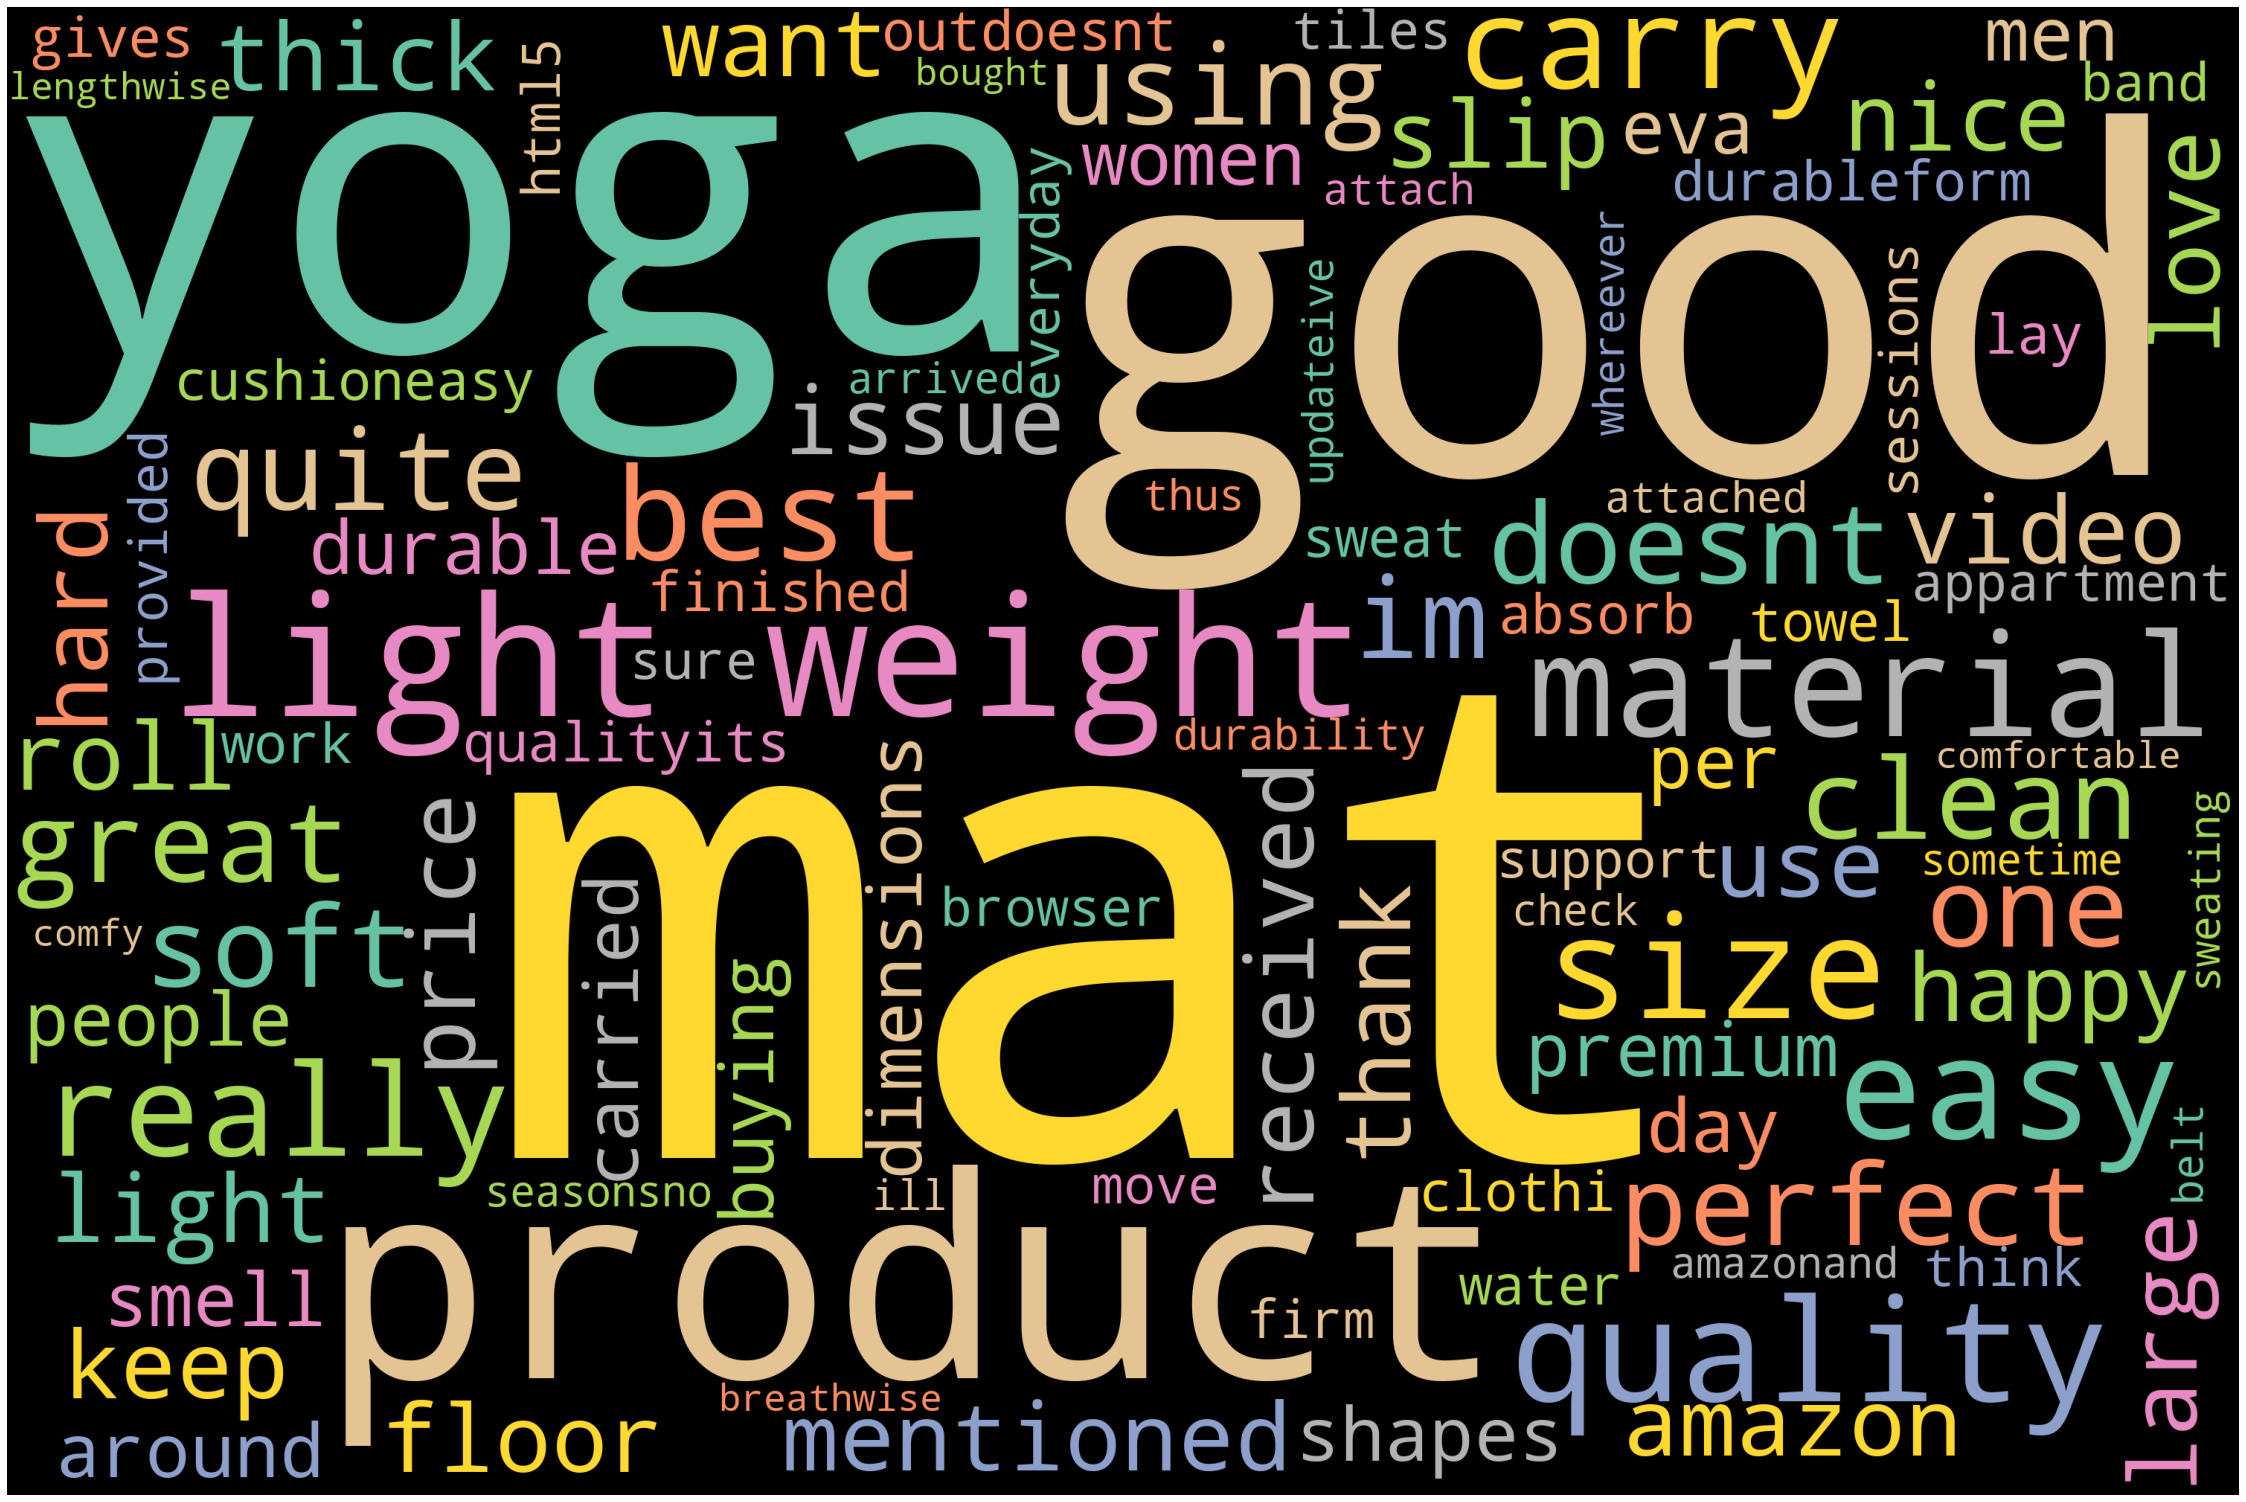

In [53]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(df_string)
# Plot
plot_cloud(wordcloud)

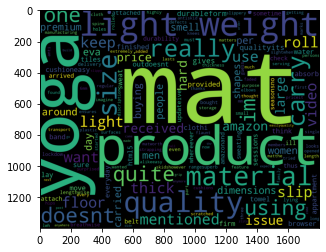

In [54]:
#Importing postive words
with open ("D:/DATA SCIENCE/1. Data Scientist/Assignment/10. text mining/positive-words.txt","r")as pos:
    poswords = pos.read().split("\n")
    poswords =poswords[10:]
pos_words = ' '.join([word for word in lower_words if not word in poswords])
cloud_pos = WordCloud(background_color = 'black',width =1800,height =1400).generate(pos_words)
plt.imshow(cloud_pos)

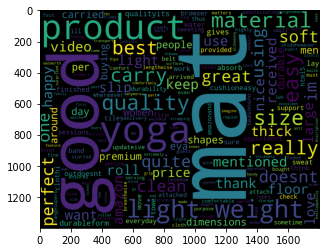

In [55]:
#Importing negative words
with open ("D:/DATA SCIENCE/1. Data Scientist/Assignment/10. text mining/negative-words.txt","r")as nos:
    negwords = nos.read().split("\n")
    negwords =negwords[10:]
neg_words = ' '.join([word for word in lower_words if not word in negwords])
cloud_neg = WordCloud(background_color = 'black',width =1800,height =1400).generate(neg_words)
plt.imshow(cloud_neg)

In [56]:
# Perform Sentiment Analysis on Tweets
from textblob import TextBlob
analysis = TextBlob(df_string)
print(analysis.sentiment)
print("")

Sentiment(polarity=0.4179761904761905, subjectivity=0.6383406906483832)



In [57]:
# sentiment score is dependent on how clean data is
# polarity tells you how positive/negative is the statment
# subjectivity expresses about personal feelings,views,beliefs